In [1]:
import glob
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import typing as tp

import numpy as np
import torchvision.transforms as T
from filterpy.kalman import KalmanFilter

import model.transforms as transforms

from config import CONFIG

In [2]:
def set_default_layout(fig: go.Figure, title: str = '') -> None:
    fig.update_layout(
        title=title,
        xaxis_title='Frame',
        hoverlabel=dict(
            namelength=-1,
        ),
        margin=dict(
            l=0,
            r=0,
            t=50,
        ),
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="right",
            x=0.99
        )
    )


def create_figure(title: str = ''):
    fig = go.Figure()

    for group in ('X', 'Y', 'Z'):
        fig.add_trace(go.Scatter(y=[None], mode='none', name=group, legendgroup=group))

    set_default_layout(fig, title)
    return fig


def plot_line(data: tp.Any, fig: tp.Optional[go.Figure] = None):
    if fig is None:
        fig = go.Figure()
        set_default_layout(fig)
    fig.add_trace(go.Scatter(y=data, mode='lines'))
    return fig

In [3]:
# Points:
# NOSE = 0 (-)
# LEFT_EYE_INNER = 1 (-)
# LEFT_EYE = 2 (-)
# LEFT_EYE_OUTER = 3 (-)
# RIGHT_EYE_INNER = 4 (-)
# RIGHT_EYE = 5 (-)
# RIGHT_EYE_OUTER = 6 (-)
# LEFT_EAR = 7 (-)
# RIGHT_EAR = 8 (-)
# MOUTH_LEFT = 9 (-)
# MOUTH_RIGHT = 10 (-)
# LEFT_SHOULDER = 11 (0)
# RIGHT_SHOULDER = 12 (1)
# LEFT_ELBOW = 13 (2)
# RIGHT_ELBOW = 14 (3)
# LEFT_WRIST = 15 (4)
# RIGHT_WRIST = 16 (5)
# LEFT_PINKY = 17 (6)
# RIGHT_PINKY = 18 (7)
# LEFT_INDEX = 19 (8)
# RIGHT_INDEX = 20 (9)
# LEFT_THUMB = 21 (10)
# RIGHT_THUMB = 22 (11)
# LEFT_HIP = 23 (12)
# RIGHT_HIP = 24 (13)
# LEFT_KNEE = 25 (-)
# RIGHT_KNEE = 26 (-)
# LEFT_ANKLE = 27 (-)
# RIGHT_ANKLE = 28 (-)
# LEFT_HEEL = 29 (-)
# RIGHT_HEEL = 30 (-)
# LEFT_FOOT_INDEX = 31 (-)
# RIGHT_FOOT_INDEX = 32 (-)

In [4]:
files_folder = CONFIG.mediapipe.points_pose_world

transform = T.Compose([
    transforms.TestTransforms(),
])

In [5]:
kf = KalmanFilter(dim_x=2, dim_z=1, dim_u=0)

delta_t = 1 / 30
sigma_u = 0.1
sigma_z = 0.01
F = [
    [1, delta_t],
    [0, 1],
]
H = [
    [1, 0],
]
P = [
    [0.01 ** 2, 0],
    [0, 0.01 ** 2],
]
R = [[1]]
Q = [
    [1/4 * delta_t ** 2, 1/2 * delta_t],
    [1/2 * delta_t, 1],
]
kf.F = np.array(F)
kf.H = np.array(H)
kf.P = np.array(P)
kf.R = np.array(R) * (sigma_z ** 2)
kf.Q = np.array(Q) * (delta_t ** 2) * (sigma_u ** 2)

In [6]:
GESTURE = 'call'
HAND = 'left'

file_paths = sorted(glob.glob(os.path.join(files_folder, f'G*_{GESTURE}_{HAND}_trial*.npy')))

In [7]:
MP_POINT = 15

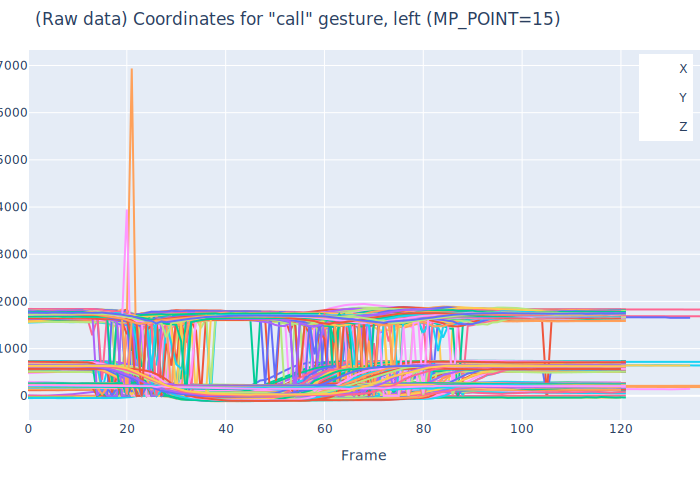

In [9]:
fig = create_figure(f'(Raw data) Coordinates for "{GESTURE}" gesture, {HAND} ({MP_POINT=})')

for file in file_paths:
    data = np.load(file)

    points = data[:, MP_POINT*3:(MP_POINT+1)*3]

    fig.add_trace(go.Scatter(y=points[:, 0],
                    mode='lines',
                    name=os.path.basename(file),
                    legendgroup='X',
                    showlegend=False,
    ))
    fig.add_trace(go.Scatter(y=points[:, 1],
                    mode='lines',
                    name=os.path.basename(file),
                    legendgroup='Y',
                    showlegend=False,
    ))
    fig.add_trace(go.Scatter(y=points[:, 2],
                    mode='lines',
                    name=os.path.basename(file),
                    legendgroup='Z',
                    showlegend=False,
    ))

fig.show()
fig.show('svg')

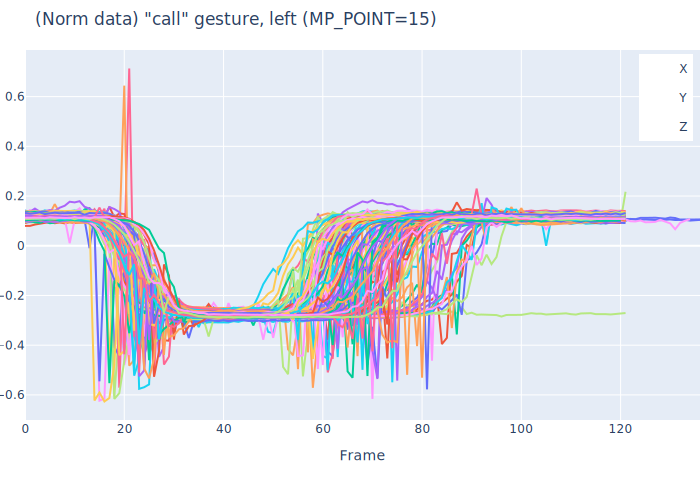

In [10]:
fig = create_figure(f'(Norm data) "{GESTURE}" gesture, {HAND} ({MP_POINT=})')

for file in file_paths:
    data = np.load(file)

    points = np.zeros((data.shape[0], 3))
    for i, frame_data in enumerate(data):
        points[i] = transform(frame_data)[MP_POINT-11]

    # fig.add_trace(go.Scatter(y=points[:, 0],
    #                 mode='lines',
    #                 name=os.path.basename(file),
    #                 legendgroup='X',
    #                 showlegend=False,
    # ))
    fig.add_trace(go.Scatter(y=points[:, 1],
                    mode='lines',
                    name=os.path.basename(file),
                    legendgroup='Y',
                    showlegend=False,
    ))
    # fig.add_trace(go.Scatter(y=points[:, 2],
    #                 mode='lines',
    #                 name=os.path.basename(file),
    #                 legendgroup='Z',
    #                 showlegend=False,
    # ))

fig.show()
fig.show('svg')

In [11]:
data_debug = np.load('mediapipe_data/pose_world/G121_call_right_trial6.npy')

In [12]:
kf = KalmanFilter(dim_x=2, dim_z=1, dim_u=0)

delta_t = 1 / 30
sigma_u = 0.75
sigma_z = 0.01
F = [
    [1, delta_t],
    [0, 1],
]
H = [
    [1, 0],
]
P = [
    [0.01 ** 2, 0],
    [0, 0.01 ** 2],
]
R = [[1]]
Q = [
    [1/4 * delta_t ** 2, 1/2 * delta_t],
    [1/2 * delta_t, 1],
]
kf.F = np.array(F)
kf.H = np.array(H)
kf.P = np.array(P)
kf.R = np.array(R) * (sigma_z ** 2)
kf.Q = np.array(Q) * (delta_t ** 2) * (sigma_u ** 2)

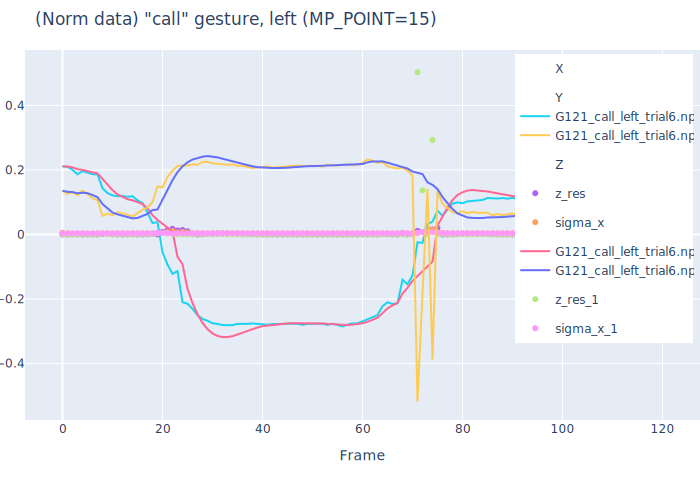

In [13]:
fig = create_figure(f'(Norm data) "{GESTURE}" gesture, {HAND} ({MP_POINT=})')

MP_POINT = 16
points = np.zeros((data_debug.shape[0], 3))

points_kf = np.zeros((data_debug.shape[0], 3))
kf.x = np.array([
    [transform(data_debug[0])[MP_POINT-11][1]],
    [0],
])
z_res_hist = np.zeros(data_debug.shape[0])
sigma_x_hist = np.zeros(data_debug.shape[0])
for i, frame_data in enumerate(data_debug):
    points[i] = transform(frame_data)[MP_POINT-11]

    new_point = transform(frame_data)[MP_POINT-11]
    kf.predict()
    z_res = kf.residual_of(new_point[1])[0][0]
    # if z_res inside sqrt(1000) * sigma_x
    if z_res ** 2 < 100 * kf.P[0, 0]:
        kf.update(new_point[1])
    points_kf[i] = kf.x[0, 0]

    z_res_hist[i] = z_res ** 2
    sigma_x_hist[i] = 100 * kf.P[0, 0]

fig.add_trace(go.Scatter(y=z_res_hist,
                mode='markers',
                name='z_res',
                legendgroup='res',
))
fig.add_trace(go.Scatter(y=sigma_x_hist,
                mode='markers',
                name='sigma_x',
                legendgroup='sigma',
))

fig.add_trace(go.Scatter(y=points[:, 1],
                mode='lines',
                name=os.path.basename(file),
                legendgroup='Y',
))
fig.add_trace(go.Scatter(y=points_kf[:, 1],
                mode='lines',
                name=os.path.basename(file),
                legendgroup='K',
))

MP_POINT = 24
points = np.zeros((data_debug.shape[0], 3))

points_kf = np.zeros((data_debug.shape[0], 3))
kf.x = np.array([
    [transform(data_debug[0])[MP_POINT-11][1]],
    [0],
])
z_res_hist = np.zeros(data_debug.shape[0])
sigma_x_hist = np.zeros(data_debug.shape[0])
for i, frame_data in enumerate(data_debug):
    points[i] = transform(frame_data)[MP_POINT-11]

    new_point = transform(frame_data)[MP_POINT-11]
    kf.predict()
    z_res = kf.residual_of(new_point[1])[0][0]
    # if z_res inside 10 * sigma_x
    if z_res ** 2 < 100 * kf.P[0, 0]:
        kf.update(new_point[1])
    points_kf[i] = kf.x[0, 0]

    z_res_hist[i] = z_res ** 2
    sigma_x_hist[i] = 100 * kf.P[0, 0]

fig.add_trace(go.Scatter(y=z_res_hist,
                mode='markers',
                name='z_res_1',
                legendgroup='res_1',
))
fig.add_trace(go.Scatter(y=sigma_x_hist,
                mode='markers',
                name='sigma_x_1',
                legendgroup='sigma_1',
))

fig.add_trace(go.Scatter(y=points[:, 1],
                mode='lines',
                name=os.path.basename(file),
                legendgroup='Y',
))
fig.add_trace(go.Scatter(y=points_kf[:, 1],
                mode='lines',
                name=os.path.basename(file),
                legendgroup='K',
))

fig.show()
fig.show('svg')

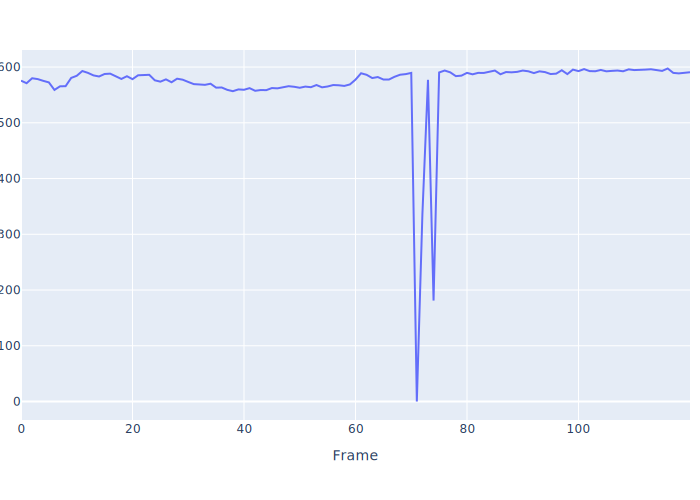

In [14]:
# 12
# 17
# 23
# 24
fig = plot_line(data_debug[:, 24*3+1])
fig.show()
fig.show('svg')